# Deep learning and neural networks

- Understanding perceptrons and multilayer perceptrons
- Working with the different types of actication functions
- Training networks with feedforward, error functions, and error optimization
- performing backpropagation

## Understanding perceptrons

- ANN(artificail neurual network) = MLP(multilayer perceptron)


### what is a perceptron

- simple neural network is the perceptron - which consists of a single neuron
- anrificial neuron performs two consecutive function
    + calculates the weighted sum of the inputs : repersent the total strngth of the input signal
    + applies a step function : to the result to determine whether to fire the output 1
        + if signal exceed a certain thershold or 0 the signal doesn' exceed the threshold 

not all input features are equally usefull or important 
- to represent that each input node is assigned a weight value : connection weight 

#### connection weights
- not all input features are not equally important
- each input feature is assigned its own weight : reflectts its importance in decision-making process
- inputs assigned greater weight have a greater effect on the output
- if weight is high : amplifies the input signal, if low : diminishes the input signal


### img of input perceptron

<img src= "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FBMQfD%2Fbtq1MpTtRXm%2FF1CI61tP0j4QcuwfVHbh5K%2Fimg.png">

### weighted sum function
- aka linear combination
    + the sum of all inputs multiplied by their weights and then added a bias term
    - $z = \sum({x_i} * {w_i} + b(bias))$

In [3]:
# python code

In [4]:
import numpy as np
w = np.array([0.1, 0.2, 0.3])
x = np.array([10, 20, 30])
b = 0.001

z = np.dot(w.T,x) + b
print(z)

14.001


#### what is a bias in the perceptron, and why do we add it?

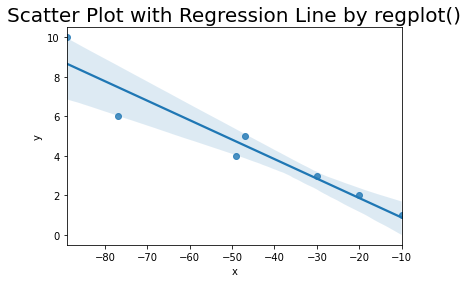

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt

y = list([1,2,3,4,10,5,6])
x = list([-10, -20, -30, -49, -89, -47, -77])

data = pd.DataFrame({"x":x, "y":y})

sns.regplot(x = data["x"] ,y = data["y"], data = data)
plt.title('Scatter Plot with Regression Line by regplot()', fontsize=20)
plt.show()

# this grap show why we the bias : which pass (0,0) is imposible 

- The function of stright line is represented by equation (y = mx +b)
- where b is the y-intercept 

---
- To be able to define a line need two things: slope of the line, point on the line
- bias is that point on the y-axis
- bias allows you to move the line up and down : better prediction with the data
---
- without bias the line always has to go through the original point(0,0) : poorer fit 

### Step activation function

- Neuron does not just output the bare input it receives
- Instead one more step : called an activation function
    + activation function : decision making unit of the brain

- In ANNs, the activation function takes the same weighted sum input 
- from before (z = Σx i · w i + b) and activates (fires) the neuron
- activates if weighted sum is higher than a certain threshold

- The simplest activation function used by the perceptron 

- step function that produces a binary output (0 or 1).
- if the summed input ≥ 0, it “fires” (output = 1);
- else (summed input < 0), it doesn’t fire (out-put = 0) 

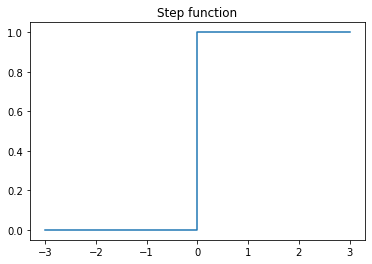

In [6]:
y = np.array([0,0,0,0,1,1,1,1])
x = np.array([-3, -2, -1,0,0,1,2,3])
data = pd.DataFrame({"x":x, "y":y})

plt.plot(data["x"], data["y"])
plt.title("Step function")
plt.show()


In [7]:
# step function(z) in python
# for the single val

def step_function(z):
    if z <= 0:
        return 0
    else:
        return 1

In [8]:
# step function(z) in python
# for the list

def step_function(num_list):
    step_list = []
    
    for i in range(len(num_list)):
        val = num_list[i] 

        if val <= 0:
            step_list.append(0)
        
        else:
            step_list.append(1)
    
    return step_list

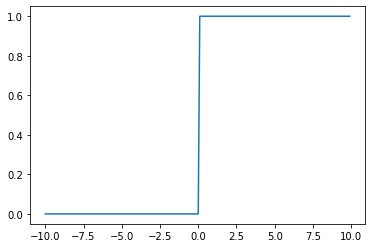

In [9]:
# data
ls = (np.arange(-10, 10, 0.1))

plt.plot(ls, step_function(ls))

### How does the perceptron learn

- The perceptron uses trial and error to learn from it mistakes
- Use the weights as knobs by tuning their values up and down until the network is trained

### The perceptron's learning logic 
- The neuron calc the weighted sum and applies the activation function to maked a prediction $\hat y$ (feeforward process)

    #### $ \hat y = activation(\sum{x_i * w_i + b})$


- Compares the output prediction with the correct label to calc the error
    #### $error =  y - \hat y$



- Updates the weight. If prediction is too high, adjusts the weight to make a lower prediction next time, vice versa too


- Repeat

- This process is repeated many times, and the neuron continues to update the weight to import predictions until step2 produce very small error

### Is one neuron enough to solve complex problems?

- Short answer is no
#### then why?


- The perceptron is a linear function, trained neuron will produce a straight line that separates our data
- Single perceptron works fine when our data was linearly separable.


#### Complex dataset example

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fy8tcL%2Fbtq11AlXlmj%2FBZtQlFxIkP3qi878bCR2Mk%2Fimg.png" align="left">

#### But

- When we have a more complex dataset that cannot be separated by a straight line
- the more neurons we add, the better the network will fit our training data 
- In fact, if wee add too many neurons, this will make the network overfit the training data(Not good)


### Multilayer perceptrons 

Linear vs nonlinear problems 
- Linear datasets - The data can be split with a single straight line
- Nonlinear datasets - The data cannot be split with a single straight line
- need more than one line to form a shape that splits the data 

#### To split a nonlinear dataset, We need more than on line.


### Multilayer perceptron architecture 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F0Ovqt%2Fbtq10RPjMrG%2FgFRDXGY2sTSjF8zAUvdykK%2Fimg.png">

- Main components of the neural network architecture

- Input layer - contains the feature vector
    
- Hidden layers - The neurons are stacked on top of each other
    
- Weight connections(edges)
    - assigned to each connection between the nodes 
    - reflect the importance of their influence on the final output prediction 
    
- output layers - Get the answer of prediction from our model from the output layer

- Why we called hidden layers
    + Because we don't see or control the input going into these layers or the output

### what are hidden layers?
- Core of the feature-learning process takes place 

- We stack hidden layers to learn complex features from each other until we fit our data

- If your network is not fitting the data, the solution could be adding more hidden layers

### How many layers and how many nodes in each layer?

- There is no answers
- Build network not too simple and not too complex for my data.

### Activation functions

- When building neural network, one of the design decisions "**activation function**"
- To use for neurons' calcuation
- Activation function  == transfer function == nonlinearities
---
- Activation function transform the linear combination of a weight sum into a nonlinear model 
- Activation func is placed at the end of each perceptron to decide whether to activate this neuron

#### The purpose of the activation function is to introduce nonlinearity into the network
- without activation function multilayer perceptron will perform similarly to a single perceptron
- Activation function need to restrict the output value to certain finite value

<img src = "https://blog.kakaocdn.net/dn/bULoxN/btq2s5dSehw/SnfsQDfVbaYxqW9mBocAfK/img.png">

- this model calculates the weighted sum and produces the linear function(z):
- z =  height * w1 + age * w2 + b 
- The z(output) has no bound, z could literally be any number
- We use activation function to wrap ther prediction to a finite value 

# Learn more about activation functions 

### Linear transfer function 

- Linear transfer function or called a identity function 
- output will be equal to ther input 
- no matter how many layers our neural network has,
- Doing is computing a linear activation function

- **activation(z) = z = wx+b**
---
- composition of two linear function is still linear function 
- no matter how deep you make your network, "**no learning here**"

---
Why no learning?
- y = 4x y' = 4 so backpropagation is always 4 it means we can't improving the error

### Heaviside step function(Binary classifier)

- The step function produces a binary output 
    + if input x > 0, ㅑti fires(output y = 1)
    - elif it doesn't fire 
- mainly used in binary classification problems 


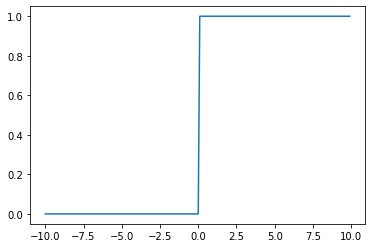

In [10]:
# data
ls = (np.arange(-10, 10, 0.1))

plt.plot(ls, step_function(ls))

# Sigmoid/ logistic function 

- one of the most common activation function
- it even used in binary classifier to predict the probalility of a each class 
- The sigmoid squishes all the values to probability between 0 and 1
- which reduce extrme values or outliers in the data without removing them 
- sigmoid or logistic function convert infinite continuous variables into simple probabilites between 0 and 1
---
sigmoid also called the s-shape curve because when plot : it produces s shaped curve

---
#### when step function is use discrete answer ( pass or fail)
#### sigmoid is used to produce the probability of passing ann failing 

In [11]:
import numpy as np 

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

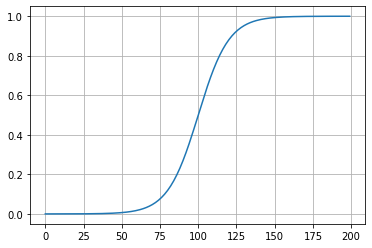

In [15]:
x = np.arange(-10, 10, 0.1)
plt.plot(sigmoid(x))
plt.grid('on')

### Just in time linear algebra

- Sigmoid

- Let's suppose we make amazing algorism with below formula
- z = $\beta_0 + \beta_1(Age)$

In [16]:
def formula(x, b0, b):
    return b0 + (b * x)

In [29]:
x = np.arange(20, 50 , 1)

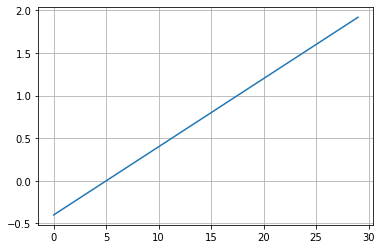

In [36]:
plt.plot(formula(x, -2, 0.08))
plt.grid("on")

- if we want to make output range 0 ~ 1 
- what we can do?

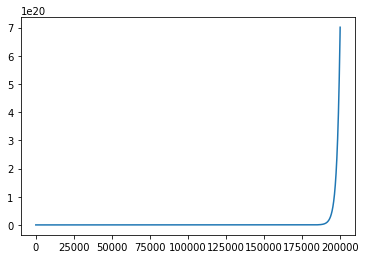

In [65]:
plt.plot(np.exp(formula(x, -2, 0.05)))
# but still exceed 1

In [63]:
x = np.arange(-1000, 1000 , 0.01)

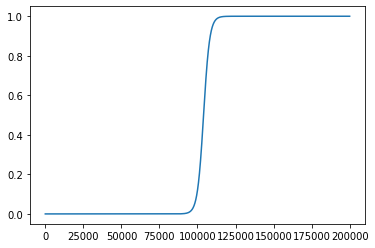

In [67]:
b = np.exp(formula(x, -2, 0.05))
a = np.exp(formula(x, -2, 0.05)) +1
plt.plot(b/a)
# divide the equation by its value plus a small value

### now we get the S shape of the sigmoid function 
- This is the plot of the sigmoid function and logistic regression 

- $p = \frac{1}{1 + exp(-z)}$

# softmax function 

- softmax function is generalization of the sigmoid function 
- this is used to obtain classification probability when more than two classed 
- softmax forces the outputs of a neural network to sum to 1 
#### in deep learning problem 
- predict a single class out of many options(more than two)

# $$\sigma(x_j) = \frac{\exp^{x_j}}{\sum_i{\exp^{x_j}}}$$

input = [1.2, 0.9, 0.4]


$ \Downarrow$

Softmax


$ \Downarrow$
 
output = [0.46, 0.34, 0.20]

# Hyperbolic tangent function (tanh)

- shifted version of the sigmoid version 
- Instead of squeezing the signal values between 0, 1
- tanh squishes all values to the range -1, 1
---
- Tanh almost always works better than the sigmoid function in hidden layer 
- Because ot has the effect of centering my data so the mean data is close to zero 
- rather than 0.5, which makes learning for next layer little bit easier 

$$ tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac {\exp^x - \exp^{-x}}{\exp^x + \exp^{-x}}$$

#### Downsides 
- both sigmoid and tanh function  is if (z) is very large or very small 
- which slow down gradient descent 
- This is when the Relu activation function provides a solution 

In [69]:
def tanh(x):
    a = np.exp(x) - np.exp(-x)
    b = np.exp(x) + np.exp(-x)
    return a/b

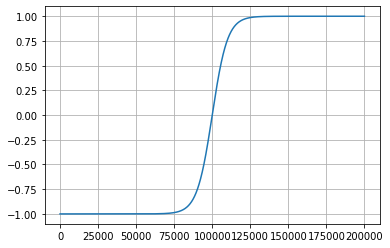

In [74]:
x = np.arange(-10, 10 , 0.0001)
plt.plot(tanh(x))
plt.grid("on")

# Rectified linear unit 

- The Rectified linear unit (Relu) is activation function 
- activates a node only if input above zero
- if input is below zero, output always zero 
- But when the input is higher than zero
- it has relationship with the output variable 
- The Relu function is represented as follows 
$$ f(X) = max(0, x)$$

#### Relu is considered the state of art activation function 
- because it works well in many different situations
- it tends to train better than sigmoid and tanh in hidden layers 

In [120]:
x = np.arange(-10, 10, 0.1)

In [131]:
def RELU(x):
    a = []
    for i in range(len(x)):
        if  x[i] <0 :
            a.append(0)
        else:
            a.append(x[i])
    return a

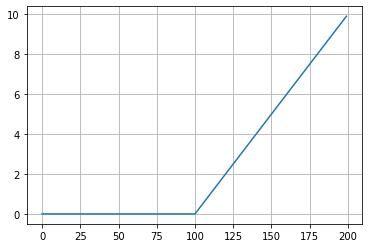

In [135]:
plt.plot(RELU(x))
plt.grid("on")

# Leaky ReLU

- One disadvantage of Relu activation 
    - derivative is equal to zero when x is negative

- Leaky Relu is Relu variation tries to mitigate this issue
- when x< 0, Leaky Relu introdueces a small negative slope

$$ f(x) = max(0.01x,x)$$

- why 0.01 some people like to use to tune this hyperparameter to tune, but overkill
- feel try values likes 0.1 , 0.01, 0.002)

In [14]:
def leaky_relu(x):
    a = []
    for i in range(len(x)):
        if x[i] < 0 :
            a.append(x[i] * 0.01)
        else:
            a.append(x[i])
    return a 

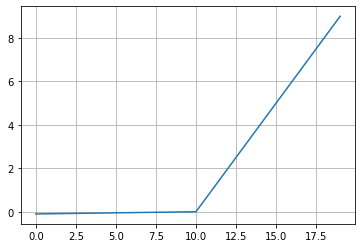

In [22]:
x = np.arange(-10, 10 , 1)
plt.plot(leaky_relu(x))
plt.grid("on")

# Hyperparameter alert

**how to select activation function**

- For hidden layes 
- Most case, Use the Relu activation function or leaky
- it is a bit faster to compute than other activation functions
- More importantly, it reduces likelihood of gradinet vanishing 
- it does not saturate for large input values 
- as opposed to the sigmoid and tanh are saturate at ~ 1
#### Remember gradient is slop 
- when function plateaus this will lead to no slope 
- hence gradient start to vanish : this make harder to descent to minimum error 

---
- For output layers
- Softmax activation function is generally a good choice for most classification pronlems 
- sigmoid function serves for binary classification
- For regression probelms simply use no activation function at all
    + since the weighted sum node produces the continuos output that you need 

#### Review 
- We learned stack perceptrons in layers,
- connect them with weights 
- perform a weight sum function
- apply activation function 

> this step is called  feedforward 

# The feedforward process

- Feedforward imply the forward direction in which the information flows
- Flows from input layers through the hidden layers 
- All the way to output layer
---
- In short forward pass is calc through the layers to make prediction 


# With Vector we can transform neural net to vector function 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmOtQM%2Fbtq3kkOGeb0%2FWilOhKZ68mL2zk41Wo9690%2Fimg.png">

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F0zvN5%2Fbtq3itZEWDU%2FJHQxoUjLKINHnh1OEEKLk0%2Fimg.png">

# Feature Learning 

- The nodes in hidden layers are the new features that are learned after each layer

- hidden layer 
- see the figure 2.20
- input layers have three feature 
- After computing the forward pass to three new feature
- next layers produce new features 
----
#### produce features after each layers are not totally understood
- we don't see them
- and do not control much
- This is Why we called hidden layers 

### What we do is with hidden layers 
- we look at the final output prediction
- keep tuning some parameters until we are satisfied by network's perfomance

# Error functions

- We learned how to implemnment the forward pass in neural networks 

**Now how do we evaluate the prediction that the network just produced**

- More importantly : how do we know how far this prediction is from the correct answer

- answer is measure the error

- selection of an error function is another important aspect of design of a neural networks
- error function is referred to cost function or loss function

# What is the error function 